In [1]:
from astropy.io import fits
import numpy as np
import aplpy
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing
import sys
import warnings 
sys.path.append('./../')
warnings.filterwarnings('ignore')

from tools_contsub_misc import *
from tools_contsub_anchoring import * 
from tools_contsub_plots import *

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in" 

import warnings 
warnings.filterwarnings('ignore')

In [2]:
galaxy = 'ngc628c'
galaxy_muse = 'ngc0628'
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 
run_cleanup = True

narrowband_filter = 'f658n'
instrument_f555w  = 'acs'
instrument_f65Xn = 'acs'
instrument_f814w = 'acs'

# Take the anchored version, careful of name change in variable
hdu_muse_stars      = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_muse_neb        = get_hdu(rootdir, 'muse/%s_nebmask.fits' %galaxy_muse.upper())
hdu_muse            = get_hdu(rootdir, 'muse/%s*_MAPS.fits' %galaxy_muse.upper(), 'all')
hdu_muse_ha         = hdu_muse['HA6562_FLUX']
hdu_muse_f555w      = get_hdu(rootdir, 'hst_contsub/%s_muse_f555w.fits' %galaxy)
hdu_muse_f65Xn      = get_hdu(rootdir, 'hst_contsub/%s_muse_%s.fits' %(galaxy, narrowband_filter))
hdu_muse_f814w      = get_hdu(rootdir, 'hst_contsub/%s_muse_f814w.fits' %galaxy )
hdu_hst_f555w       = get_hdu(rootdir, 'hst_contsub/%s_hst_f555w.fits' %galaxy)
hdu_hst_f65Xn       = get_hdu(rootdir, 'hst_contsub/%s_hst_%s.fits' %(galaxy, narrowband_filter))
hdu_hst_f814w       = get_hdu(rootdir, 'hst_contsub/%s_hst_f814w.fits' %galaxy)
hdu_hst_ha          = get_hdu(rootdir, 'hst_contsub/%s_hst_ha.fits' %galaxy)
hdu_hst_an_cont     = get_hdu(rootdir, 'hst_contsub/%s_hst_%s_an_cont.fits' %(galaxy, narrowband_filter))
hdu_hst_an_contsub  = get_hdu(rootdir, 'hst_contsub/%s_hst_%s_an_contsub.fits' %(galaxy, narrowband_filter))
hdu_muse_contsub    = get_hdu(rootdir, 'hst_contsub/%s_muse_%s_contsub.fits' %(galaxy, narrowband_filter))
hdu_hst_f555w_smre  = get_hdu(rootdir, 'hst_contsub/%s_hst_f555w_smre.fits' %galaxy)
hdu_hst_f65Xn_smre  = get_hdu(rootdir, 'hst_contsub/%s_hst_%s_smre.fits' %(galaxy, narrowband_filter))
hdu_hst_f814w_smre  = get_hdu(rootdir, 'hst_contsub/%s_hst_f814w_smre.fits' %galaxy)
hdu_hst_f555w_an    = get_hdu(rootdir, 'hst_contsub/%s_hst_f555w_an.fits' %galaxy) 
hdu_hst_f65Xn_an    = get_hdu(rootdir, 'hst_contsub/%s_hst_%s_an.fits' %(galaxy, narrowband_filter)) 
# hdu_hst_f65Xn_anf   = get_hdu(rootdir, 'hst_contsub/%s_hst_%s_anf.fits' %(galaxy, narrowband_filter)) 
hdu_hst_f814w_an    = get_hdu(rootdir, 'hst_contsub/%s_hst_f814w_an.fits' %galaxy) 

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_starmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_nebmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628-0.92asec_MAPS.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_muse_f555w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_muse_f658n.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_muse_f814w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_hst_f555w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_hst_f658n.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/ngc628c_hst_f814w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hs

In [3]:
def get_mask(hdu):
    mask = ~np.isnan(hdu.data)*1
    mask_close = binary_closing(mask, structure=np.ones((10,10)), iterations=1)
    mask_hdu = fits.PrimaryHDU(np.int32(mask_close*1), hdu.header)
    return(mask_hdu) 

hdu_mask = get_mask(hdu_hst_f555w_smre)

ra, dec, size = 24.1721149, 15.7806457, 0.035
bbox = dict(facecolor='whitesmoke',  alpha=0.95, boxstyle='round')

In [ ]:
# Maps anchor 

label = [
         'HST F555W', 'HST F658N', 'HST F814W',
         'HST F555W smooth regrid', 'HST F658N smooth regrid', 'HST F814W smooth regrid',
         'MUSE F555W', 'MUSE F658N', 'MUSE F814W',
         'HST F555W anchored', 'HST F658N anchored', 'HST F814W anchored',
         ]

hdus = [
        hdu_hst_f555w, hdu_hst_f65Xn, hdu_hst_f814w,
        hdu_hst_f555w_smre, hdu_hst_f65Xn_smre, hdu_hst_f814w_smre,
        hdu_muse_f555w, hdu_muse_f65Xn, hdu_muse_f814w, 
        hdu_hst_f555w_an, hdu_hst_f65Xn_an, hdu_hst_f814w_an,
        ]

fig = plt.figure(figsize=(10, 10))

for i, hdu in enumerate(hdus):

    hdu.data[hdu.data==0] = np.nan
    ax = aplpy.FITSFigure(hdu, subplot=(4, 3, i+1), figure=fig)

    vmin, vmax = np.nanpercentile(hdu.data, (2, 99))
    ax.show_colorscale(vmin=vmin, vmax=vmax, cmap='inferno')

    ax.show_contour(hdu_mask, levels=[0], colors='black', zorder=0, lw=0.5)

    ax.recenter(ra, dec, size)
    ax.axis_labels.hide()
    ax.tick_labels.hide()

    ax.add_colorbar()
    ax.ticks.set_color('black')
    ax.colorbar.set_width(0.15)

    ax.add_label(0.05, 0.95, label[i],  ha='left', va='top', size=10, bbox = bbox, relative=True)

    ax.set_nan_color('lightgrey')

    ax_plot = fig.get_axes()[-2]
    ax_plot.grid(True, alpha=0.3, ls=':', color='white')

    if i in [2, 5, 8, 11]: #top row...
        ax.colorbar.set_axis_label_text('$F_\lambda$ (erg/s/cm$^2$/$\AA$/pixel)')

    ax_cbar = fig.get_axes()[-1]
    ax_cbar.yaxis.set_ticks_position('both')

fig.tight_layout(h_pad=0.5, w_pad=0)
fig.savefig('./figs/%s_maps_anchor.pdf' %galaxy, bbox_inches='tight', dpi=300)  

[INFO] Pixel scale: 0.04 arcsec arcsec
[INFO] Initial Resolution: 0.07 arcsec arcsec
[INFO] Desired Resolution: 0.21 arcsec arcsec
[INFO] Convolution kernel: 0.20 arcsec arcsec
[INFO] Performing image convolution...
[INFO] Image convolution complete.
[INFO] Smoothing process completed.


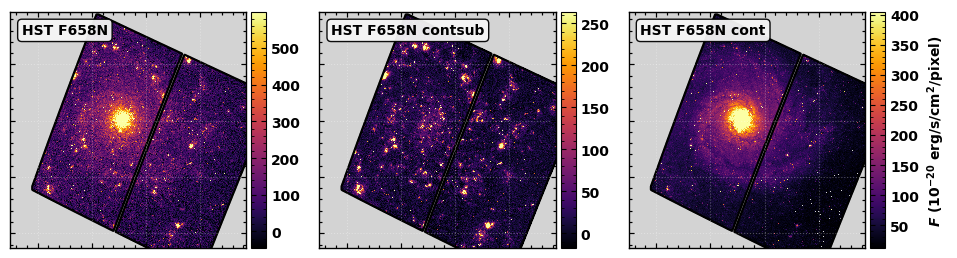

In [6]:
# Maps contsub
smooth_factor=3
resolution = 0.07*u.arcsec
hdu_hst_an_contsub_sm = get_smooth(hdu_hst_an_contsub, resolution, resolution*smooth_factor)

hdus = [
        hdu_hst_f65Xn_an, hdu_hst_an_contsub_sm, hdu_hst_an_cont,
        ]

label = ['HST F658N', 'HST F658N contsub', 'HST F658N cont']

fig = plt.figure(figsize=(10, 10))

for i, hdu in enumerate(hdus):

    hdu.data[hdu.data==0] = np.nan
    ax = aplpy.FITSFigure(hdu, subplot=(4, 3, i+1), figure=fig)

    vmin, vmax = np.nanpercentile(hdu.data, (1, 99))
    ax.show_colorscale(vmin=vmin, vmax=vmax, cmap='inferno')

    ax.show_contour(hdu_mask, levels=[0], colors='black', zorder=0, lw=0.5)

    ax.recenter(ra, dec, size)
    ax.axis_labels.hide()
    ax.tick_labels.hide()

    ax.add_colorbar()
    ax.ticks.set_color('black')
    ax.colorbar.set_width(0.15)
    
    ax.add_label(0.05, 0.95, label[i],  ha='left', va='top', size=10, bbox = bbox, relative=True)

    ax.set_nan_color('lightgrey')

    ax_plot = fig.get_axes()[-2]
    ax_plot.grid(True, alpha=0.3, ls=':', color='white')

    if i in [2, 5, 8, 11]: #top row...
        ax.colorbar.set_axis_label_text('$F$ (10$^{-20}$ erg/s/cm$^2$/pixel)')

    ax_plot = fig.get_axes()[-2]
    ax_cbar = fig.get_axes()[-1]
    ax_cbar.yaxis.set_ticks_position('both')
    ax_plot.set_facecolor('lightgrey')

fig.tight_layout(h_pad=0.5, w_pad=0)
fig.savefig('./figs/%s_maps_contsub.pdf' %galaxy, bbox_inches='tight', dpi=300)  

[INFO] Pixel scale: 0.04 arcsec arcsec
[INFO] Initial Resolution: 0.07 arcsec arcsec
[INFO] Desired Resolution: 0.21 arcsec arcsec
[INFO] Convolution kernel: 0.20 arcsec arcsec
[INFO] Performing image convolution...
[INFO] Image convolution complete.
[INFO] Smoothing process completed.


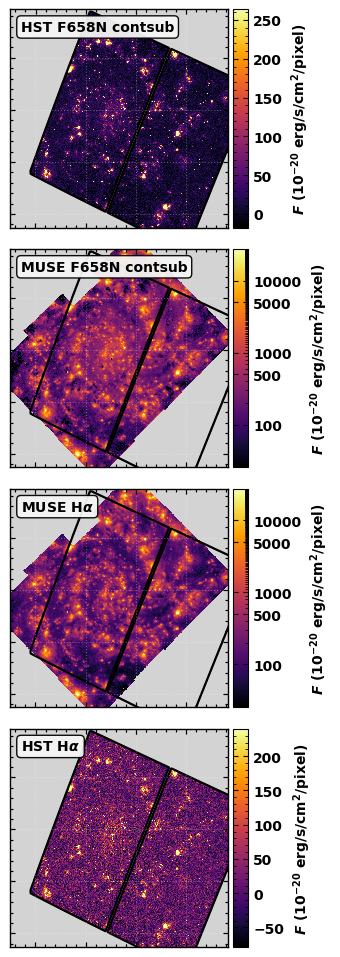

In [8]:
# Maps contsub anchor 
smooth_factor=3
resolution = 0.07*u.arcsec
hdu_hst_ha_sm = get_smooth(hdu_hst_an_contsub, resolution, resolution*smooth_factor)

hdus = [
        hdu_hst_an_contsub_sm, hdu_muse_contsub, hdu_muse_ha, hdu_hst_ha,
        # hdu_muse_ha, hdu_muse_contsub,
        ]

label = ['HST F658N contsub', 'MUSE F658N contsub', r'MUSE H$\alpha$', r'HST H$\alpha$']

fig = plt.figure(figsize=(3.5, 10))

for i, hdu in enumerate(hdus):

    hdu.data[hdu.data==0] = np.nan
    ax = aplpy.FITSFigure(hdu, subplot=(4, 1, i+1), figure=fig)

    if i in [1,2]:
        vmin, vmax = np.nanpercentile(hdus[2].data, (0.1, 99.9))
        ax.show_colorscale(vmin=vmin, vmax=vmax, cmap='inferno', stretch='log')
    else:
        vmin, vmax = np.nanpercentile(hdu.data, (1, 99))
        ax.show_colorscale(vmin=vmin, vmax=vmax, cmap='inferno')

    ax.show_contour(hdu_mask, levels=[0], colors='black', zorder=0, lw=0.5)

    ax.recenter(ra, dec, size)
    ax.axis_labels.hide()
    ax.tick_labels.hide()

    ax.add_colorbar()
    ax.ticks.set_color('black')
    ax.colorbar.set_width(0.15)

    ax.add_label(0.05, 0.95, label[i],  ha='left', va='top', size=10, bbox = bbox, relative=True)

    ax.set_nan_color('lightgrey')

    ax_plot = fig.get_axes()[-2]
    ax_plot.grid(True, alpha=0.3, ls=':', color='white')

    ax.colorbar.set_axis_label_text('$F$ (10$^{-20}$ erg/s/cm$^2$/pixel)')
    
    ax_plot = fig.get_axes()[-2]
    ax_cbar = fig.get_axes()[-1]
    ax_cbar.yaxis.set_ticks_position('both')
    ax_plot.set_facecolor('lightgrey')

    if i in [1,2]:
        ax.colorbar.set_ticks([1e2,5e2,1e3,5e3,1e4])

fig.tight_layout(h_pad=0.5, w_pad=0)
fig.savefig('./figs/%s_maps_anchor_contsub.pdf' %galaxy, bbox_inches='tight', dpi=300)  